# SYMBOLIC STUDY
## **DOUBLE WISHBONE DIRECT ACTING**
------------------------------------

## SYSTEM DISCRIPTION
--------

_Double click to write a discription here ..._

--------

In [1]:
import sys
pkg_path = r'/home/khaledghobashy/Documents/asurt_cdt_symbolic'
sys.path.append(pkg_path)

## SYSTEM TOPOLOGY
--------

In [2]:
from asurt.interfaces.scripting import template_topology

In [3]:
sym_model = template_topology('double_wishbone_direct_acting')

### ADDING SYSTEM BODIES

In [4]:
sym_model.add_body('uca', mirrored=True)
sym_model.add_body('lca', mirrored=True)
sym_model.add_body('upright', mirrored=True)
sym_model.add_body('upper_strut', mirrored=True)
sym_model.add_body('lower_strut' ,mirrored=True)
sym_model.add_body('tie_rod', mirrored=True)
sym_model.add_body('hub', mirrored=True)
sym_model.add_body('steer', mirrored=True, virtual=True)
sym_model.add_body('chassis', virtual=True)

### ADDING SYSTEM JOINTS

In [5]:
sym_model.add_joint.spherical('uca_upright', 'rbr_uca', 'rbr_upright', mirrored=True)
sym_model.add_joint.spherical('lca_upright', 'rbr_lca', 'rbr_upright', mirrored=True)
sym_model.add_joint.spherical('tie_upright', 'rbr_tie_rod', 'rbr_upright', mirrored=True)
sym_model.add_joint.revolute('uca_chassis', 'rbr_uca', 'vbs_chassis', mirrored=True)
sym_model.add_joint.revolute('lca_chassis', 'rbr_lca', 'vbs_chassis', mirrored=True)
sym_model.add_joint.revolute('hub_bearing', 'rbr_upright', 'rbr_hub', mirrored=True)
sym_model.add_joint.universal('strut_chassis', 'rbr_upper_strut', 'vbs_chassis', mirrored=True)
sym_model.add_joint.universal('strut_lca', 'rbr_lower_strut', 'rbr_lca', mirrored=True)
sym_model.add_joint.universal('tie_steering', 'rbr_tie_rod', 'vbr_steer', mirrored=True)
sym_model.add_joint.cylinderical('strut', 'rbr_upper_strut', 'rbr_lower_strut', mirrored=True)

### ADDING SYSTEM ACTUATORS

In [ ]:
#template.actuator.rotational_actuator('actuator_name', 'joint_name', mirror=False)

### ADDING SYSTEM FORCES

In [6]:
sym_model.add_force.internal_force('strut', 'rbr_upper_strut', 'rbr_lower_strut', mirrored=True)

### ASSEMBLING AND SAVING SYSTEM

In [7]:
sym_model.assemble_model()
sym_model.save()

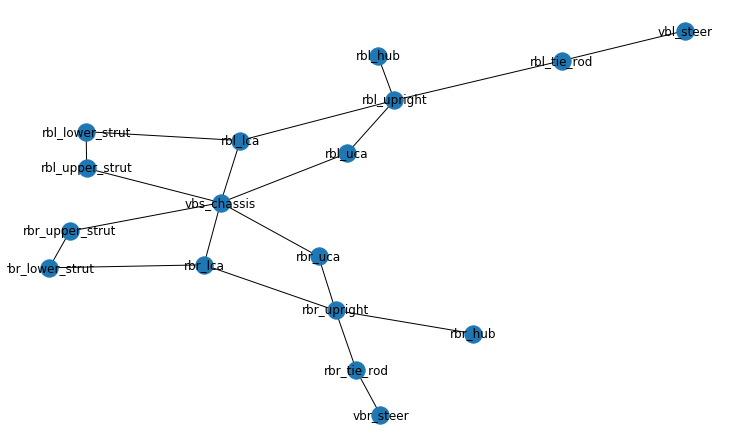

In [8]:
sym_model._mbs.draw_constraints_topology()

--------

## SYSTEM CONFIGURATION
--------

In [9]:
from asurt.interfaces.scripting import configuration

In [21]:
config_name = 'double_wishbone_direct_acting_cfg'
config = configuration(config_name, sym_model)

### CONFIGURATION INPUTS

#### POINTS & VECTORS

In [22]:
config.add_point.UserInput('ucaf', mirror=True)
config.add_point.UserInput('ucar', mirror=True)
config.add_point.UserInput('ucao', mirror=True)
config.add_point.UserInput('lcaf', mirror=True)
config.add_point.UserInput('lcar', mirror=True)
config.add_point.UserInput('lcao', mirror=True)
config.add_point.UserInput('tro', mirror=True)
config.add_point.UserInput('tri', mirror=True)
config.add_point.UserInput('strut_chassis', mirror=True)
config.add_point.UserInput('strut_lca', mirror=True)
config.add_point.UserInput('strut_mid', mirror=True)
config.add_point.UserInput('wc', mirror=True)
config.add_point.UserInput('wc1', mirror=True)
config.add_point.UserInput('wc2', mirror=True)


config.add_vector.UserInput('x')
config.add_vector.UserInput('y')
config.add_vector.UserInput('z')

### CONFIGURATION RELATIONS

In [23]:
config.add_point.Centered('strut_mid', ('hpr_strut_chassis', 'hpr_strut_lca'), mirror=True)

# Spherical Joints:
config.add_relation.Equal_to('pt1_jcr_uca_upright', ('hpr_ucao',), mirror=True)
config.add_relation.Equal_to('ax1_jcr_uca_upright', ('vcs_z',), mirror=True)

config.add_relation.Equal_to('pt1_jcr_lca_upright', ('hpr_lcao',), mirror=True)
config.add_relation.Equal_to('ax1_jcr_lca_upright', ('vcs_z',), mirror=True)

config.add_relation.Equal_to('pt1_jcr_tie_upright', ('hpr_tro',), mirror=True)
config.add_relation.Equal_to('ax1_jcr_tie_upright', ('vcs_z',), mirror=True)

# Upper Control Arm Revolute Joint:
config.add_relation.Centered('pt1_jcr_uca_chassis', ('hpr_ucaf','hpr_ucar'), mirror=True)
config.add_relation.Oriented('ax1_jcr_uca_chassis', ('hpr_ucaf','hpr_ucar'), mirror=True)

# Lower Control Arm Revolute Joint:
config.add_relation.Centered('pt1_jcr_lca_chassis', ('hpr_lcaf','hpr_lcar'), mirror=True)
config.add_relation.Oriented('ax1_jcr_lca_chassis', ('hpr_lcaf','hpr_lcar'), mirror=True)

# Wheel Hub Revolute Joint:
config.add_relation.Equal_to('pt1_jcr_hub_bearing', ('hpr_wc',), mirror=True)
config.add_relation.Equal_to('ax1_jcr_hub_bearing', ('vcs_y',), mirror=True)

# Strut-Chassis Universal Joint:
config.add_relation.Equal_to('pt1_jcr_strut_chassis', ('hpr_strut_chassis',), mirror=True)
config.add_relation.Oriented('ax1_jcr_strut_chassis', ('hpr_strut_chassis','hpr_strut_lca'), mirror=True)
config.add_relation.Oriented('ax2_jcr_strut_chassis', ('hpr_strut_lca','hpr_strut_chassis'), mirror=True)

# Strut-LCA Universal Joint:
config.add_relation.Equal_to('pt1_jcr_strut_lca', ('hpr_strut_lca',), mirror=True)
config.add_relation.Oriented('ax1_jcr_strut_lca', ('hpr_strut_chassis','hpr_strut_lca'), mirror=True)
config.add_relation.Oriented('ax2_jcr_strut_lca', ('hpr_strut_lca','hpr_strut_chassis'), mirror=True)

# Tie-Steer Universal Joint:
config.add_relation.Equal_to('pt1_jcr_tie_steering', ('hpr_tri',), mirror=True)
config.add_relation.Oriented('ax1_jcr_tie_steering', ('hpr_tri','hpr_tro'), mirror=True)
config.add_relation.Oriented('ax2_jcr_tie_steering', ('hpr_tro','hpr_tri'), mirror=True)

# Strut Cylinderical Joint:
config.add_relation.Equal_to('pt1_jcr_strut', ('hpr_strut_mid',), mirror=True)
config.add_relation.Oriented('ax1_jcr_strut', ('hpr_strut_lca','hpr_strut_chassis'), mirror=True)

### CONFIGURATION GEOMETRIES

In [24]:
config.add_scalar.UserInput('links_ro')
config.add_scalar.UserInput('strut_outer')
config.add_scalar.UserInput('strut_inner')
config.add_scalar.UserInput('thickness')
config.add_scalar.UserInput('hub_radius')

config.add_geometry.Triangular_Prism('uca', ('hpr_ucaf','hpr_ucar','hpr_ucao','s_thickness'), mirror=True)
config.assign_geometry_to_body('rbr_uca', 'gmr_uca', mirror=True)

config.add_geometry.Triangular_Prism('lca', ('hpr_lcaf','hpr_lcar','hpr_lcao','s_thickness'), mirror=True)
config.assign_geometry_to_body('rbr_lca', 'gmr_lca', mirror=True)

config.add_geometry.Triangular_Prism('upright', ('hpr_ucao','hpr_wc','hpr_lcao','s_thickness'), mirror=True)
config.assign_geometry_to_body('rbr_upright', 'gmr_upright', mirror=True)

config.add_geometry.Cylinder_Geometry('upper_strut', ('hpr_strut_chassis','hpr_strut_mid','s_strut_outer'), mirror=True)
config.assign_geometry_to_body('rbr_upper_strut', 'gmr_upper_strut', mirror=True)

config.add_geometry.Cylinder_Geometry('lower_strut', ('hpr_strut_mid','hpr_strut_lca','s_strut_inner'), mirror=True)
config.assign_geometry_to_body('rbr_lower_strut', 'gmr_lower_strut', mirror=True)

config.add_geometry.Cylinder_Geometry('tie_rod', ('hpr_tri','hpr_tro','s_links_ro'), mirror=True)
config.assign_geometry_to_body('rbr_tie_rod', 'gmr_tie_rod', mirror=True)

config.add_geometry.Cylinder_Geometry('hub', ('hpr_wc1','hpr_wc2','s_hub_radius'), mirror=True)
config.assign_geometry_to_body('rbr_hub', 'gmr_hub', mirror=True)

### ASSEMBLING AND SAVING CONFIGURATION

In [25]:
config.assemble_model()

In [26]:
config.extract_inputs_to_csv()

## CODE GENERATION

### CREATING TOPOLOGY & CONFIGURATION NUMERICAL CODE FILES

In [16]:
from asurt.numenv.python.codegen import generators

In [17]:
model_code = generators.template_codegen(sym_model._mbs)
model_code.write_code_file('numenv/templates')

File full path : numenv/templates/double_wishbone_direct_acting.py


In [27]:
config_code = generators.configuration_codegen(config._config)
config_code.write_code_file('numenv/configurations')

File full path : numenv/configurations/double_wishbone_direct_acting_cfg.py


### CREATING BLENDER PYTHON SCRIPT

In [28]:
from asurt.utilities.blender.codegen import script_generator

In [29]:
bpy_code = script_generator(config._config)
bpy_code.write_code_file('numenv/blender')